## Análise dos Dados de Créditos Alemães

Este dataset contém ao todo a classificação de crédito de 1000 clientes em um banco alemão. Associado a cada cliente existem 20 variáveis mais a variável classe (Target), com a classificação histórica de 700 clientes como adimplentes e 300 como idadimplentes. 

Os clientes adimplentes receberam o rótulo de classificação “1”, na variável resposta classe, e os clientes inadimplentes receberam o rótulo de classificação “0”.

Um ponto a se ressaltar nesta base de dados é o fato das classes “1” e “0” serem desequilibradas, ou seja, a quantidade de clientes adimplentes, é muito maior em relação aos clientes inadimplentes. Grandes diferenças entre as relações de adimplentes x inadimplentes tendem a impactar o desempenho dos modelos de classificação, com viés para a classe majoritária. 

Uma das abordagens mais utilizadas é o de balancear artificialmente o conjunto de dados: ou retirando exemplos aleatórios da classe majoritária (undersampling) ou acrescentando exemplos artificiais para a classe minoritária (oversampling). 

Neste estudo, foi utilizada a técnica de retirar aleatoriamente exemplos da classe majoritária.

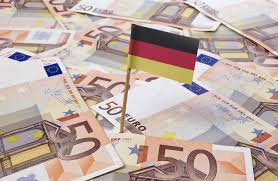

### Importando Bibliotecas Principais

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../input/german-credit-risk/german_credit.csv", sep=",")

In [ ]:
df.head()

### Verificando a presença de valores nulos

In [ ]:
df.isnull().values.any()

### Verificando o tipo de dado de cada coluna

In [ ]:
df.info()

### Descrição dos ítens e categorias

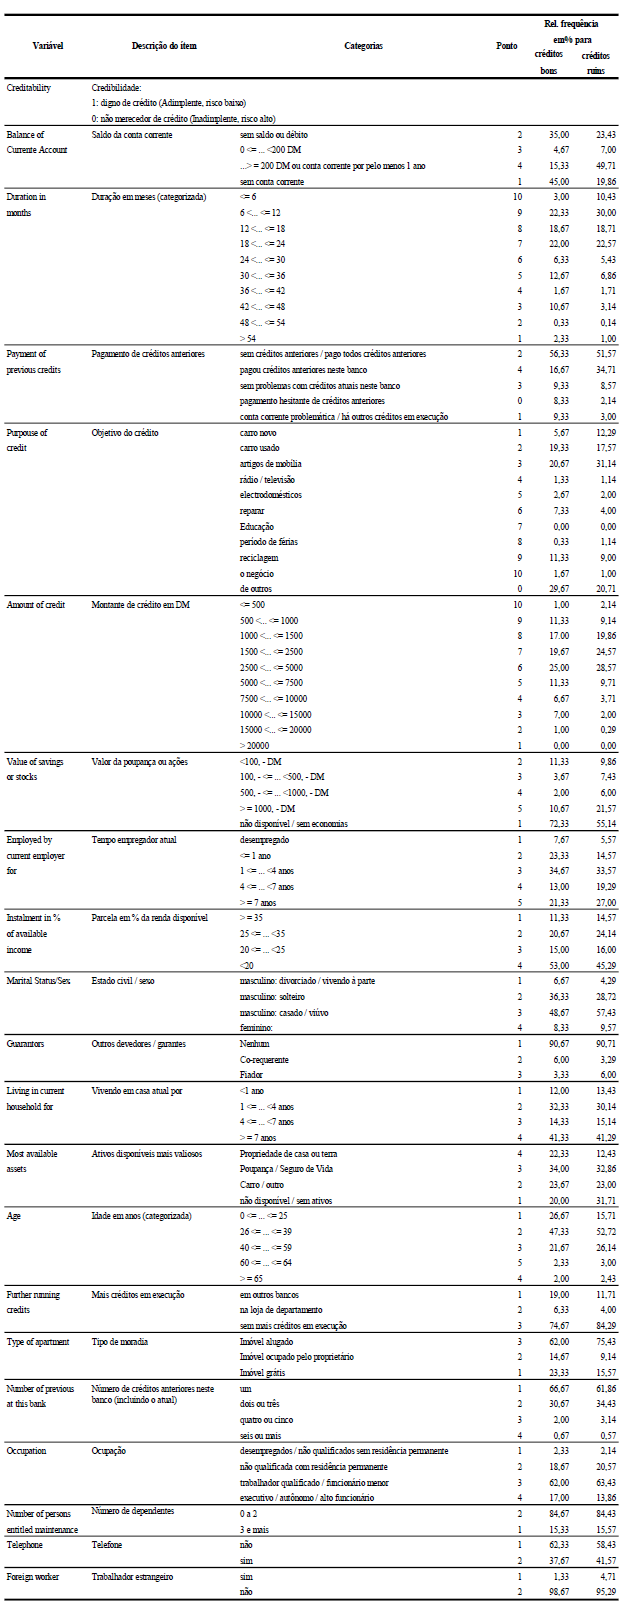

### Gráfico da variável target Creditability

In [ ]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls
import warnings 
from collections import Counter 

credit1 = go.Bar(x = df[df["Creditability"]== 1]["Creditability"].value_counts().index.values,
                y = df[df["Creditability"]== 1]["Creditability"].value_counts().values, name='Adimplentes')

credit0 = go.Bar(x = df[df["Creditability"]== 0]["Creditability"].value_counts().index.values,
                y = df[df["Creditability"]== 0]["Creditability"].value_counts().values, name='Inadimplentes')

data = [credit1, credit0]

layout = go.Layout()

layout = go.Layout(yaxis=dict(title='Quantidade'),xaxis=dict(title='Variável Classe'),title='Distribuição da Variável Classe', xaxis_type='category')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

### Gráficos Age x Creditability

In [ ]:
df_good = df.loc[df["Creditability"] == 1]['Age (years)'].values.tolist()
df_bad = df.loc[df["Creditability"] == 0]['Age (years)'].values.tolist()
df_age = df['Age (years)'].values.tolist()

#plot 1
credit1 = go.Histogram(x=df_good, histnorm='percent', name="Adimplentes")

#plot 2
credit0 = go.Histogram(x=df_bad, histnorm='percent', name="Inadimplentes")

#plot 3
creditT = go.Histogram(x=df_age, histnorm='percent', name="Geral")

#Grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Adimplentes','Inadimplentes', 'Geral'))

#Figs
fig.append_trace(credit1, 1, 1)
fig.append_trace(credit0, 1, 2)
fig.append_trace(creditT, 2, 1)

fig['layout'].update(showlegend=True, title='Distribuição Idade %', bargap=0.05)
py.iplot(fig)

### Informações estatísticas sobre a variável target "Creditability"

In [ ]:
print ('Adimplente % ',round(df['Creditability'].value_counts()[1]/len(df)*100,2))
print ()
print (df['Credit Amount'][df.Creditability == 1].describe().round(2))
print ()
print ()
print ('Inadimplente % ',round(df['Creditability'].value_counts()[0]/len(df)*100,2))
print ()
print (df['Credit Amount'][df.Creditability == 0].describe().round(2))

In [ ]:
ax = sns.boxplot(x="Creditability", y="Credit Amount", data=df, order=[1, 0])
plt.xlabel('1: Adimplente       0: Inadimplente')
plt.gcf().set_size_inches(12, 8)

### Heatmap

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

#### Podemos observar uma correlação positiva entre "Credit amount" e "Duration of Credit" de 0.62

In [ ]:
credit1 = go.Bar(x = df[df["Creditability"]== 1]["Type of apartment"].value_counts().index.values,
                 y = df[df["Creditability"]== 1]["Type of apartment"].value_counts().values, name='Adimplente')

credit0 = go.Bar(x = df[df["Creditability"]== 0]["Type of apartment"].value_counts().index.values,
                 y = df[df["Creditability"]== 0]["Type of apartment"].value_counts().values, name="Inadimplente")

data = [credit1, credit0]

layout = go.Layout(title='Moradia')

fig = go.Figure(data=data, layout=layout)

fig.update_xaxes (ticktext = [ "Alugada" ,  "Própria" ,  "Outras"],
                  tickvals = ["1", "2", "3"])

py.iplot(fig)

### Pandas Profiling

Podemos facilitar o processo de análise de dados utilizando o pandas profiling, que é uma ferramenta capaz de gerar um relatório html com várias informações estatísticas e as principais características do dataframe em apenas uma linha de código.

In [ ]:
prf = pp.ProfileReport(df)
prf

### Separação das variáveis de entrada da variável alvo (target)

In [ ]:
feature_names = df.iloc[:, 1:21].columns
target = df.iloc[:1, 0:1].columns

data_features = df[feature_names]
data_target = df[target]

In [ ]:
feature_names

In [ ]:
target

Com o conjunto de dados definido, dividimos os dados em conjuntos de treinamento e teste, importando a função train_test_split.

A função train_test_split usa um randomizador para separar os dados em conjuntos de treinamento e teste. Neste caso, foram definidos 70% dos dados para treinamento e 30% para testes.

A semente aleatória (np.random.seed), é utilizada para garantir que os mesmos dados sejam usados em todas as execuções.

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

### Construindo o modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

### Treinando o modelo

In [ ]:
rf.fit(X_train, y_train) 

Acima podemos observar os parâmetros padrão que serão utilizados para a construção do modelo.

### Matriz de Confusão - Utilizando a função PrintStats para compilar e exibir os resultados do modelo.

Matriz de Confusão - Utilizando a função PrintStats para compilar e exibir os resultados do modelo.
A Matriz de confusão é basicamente uma matriz com valores reais e valores preditos pelo classificador utilizado, onde podemos avaliar o desempenho do algorítmo.

O PrintStats toma como parâmetros uma matriz de confusão, rótulos de teste e rótulos de previsão e separa a matriz de confusão em suas partes constituintes.

In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

### Aplicando a função RunModel para treinar o modelo e gerar previsões em relação aos dados de teste

A função RunModel toma como entrada o modelo não treinado junto com todos os dados de teste e treinamento, incluindo rótulos. Ele treina o modelo, executa a previsão usando os dados de teste e retorna a matriz de confusão juntamente com os rótulos previstos.

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

Com as funções PrintStats e RunModel criadas, criamos um modelo para fazer a detecção de clientes inadimplentes. A detecção de risco de crédito é geralmente considerada um problema de duas classes, neste caso específico:

Classe 1: Clientes Inadimplentes (Em nossa variável target representada por "0")

Ou

Classe 2: Clientes Adimplentes (Em nossa variável target representada por "1")

O objetivo aqui é tentar determinar a qual classe uma transação específica pertence.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [ ]:
cmat, pred = RunModel(rf, X_train, y_train, X_test, y_test)

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
print (classification_report(y_test, pred))

Este primeiro modelo atingiu uma acurácia de 76% e foi capaz de identificar corretamente 89% dos clientes adimplentes (ver recall), mas apenas 44% dos clientes inadimplentes.

### Undersampling

Neste caso, vamos utilizar a técnica de undersampling para obter uma divisão uniforme entre clientes adimplentes e inadimplentes. Isso tornará o conjunto de treinamento pequeno, mas com dados suficientes para gerar um bom classificador.

In [ ]:
bad_records = len(df[df.Creditability == 0]) 
bad_indices = df[df.Creditability == 0].index
good_indices = df[df.Creditability == 1].index

under_sample_indices = np.random.choice(good_indices, bad_records, False)
df_undersampled = df.iloc[np.concatenate([bad_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:21]
Y_undersampled = df_undersampled.Creditability
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Utilizando o "novo" classificador para os dados balanceados - Random Forest

In [ ]:
rf_undersampled = RandomForestClassifier() 
cmat, pred = RunModel(rf_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [ ]:
accuracy_score(Y_undersampled_test, pred)

In [ ]:
print (classification_report(Y_undersampled_test, pred))

O modelo atingiu uma acurácia de 71% e apesar de identificar corretamente apenas 61% dos clientes adimplentes, a capacidade de identificar os inadimplentes subiu para 80%.

### Utilizando o "novo" classificador para os dados de teste originais

In [ ]:
rf = RandomForestClassifier()
cmat, pred = RunModel(rf, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

Aplicando o novo modelo para os dados de teste originais, a acurácia aumentou para 83%, o recall para clientes adimplentes atingiu 78%, e para os inadimplentes aumentou consideravelmente para 92%!

### GridSearchCV - Otimização de Parâmetros - Regressão Logística

O GridSearchCV é um recurso da biblioteca Scikit-learn que nos ajuda a encontrar os melhores parâmetros para o modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

### GridSearchCV - Otimização de Parâmetros - Random Forest

In [ ]:
param_grid = {"criterion": ['entropy', 'gini'],
              "n_estimators": [25, 50, 75],
              "n_jobs": [1, 2, 3, 4],
              "max_features": ['auto', 0.1, 0.2, 0.3]}

grid_search_rf = GridSearchCV(rf, param_grid, scoring="precision")
grid_search_rf.fit(y_test, pred)

rf = grid_search_rf.best_estimator_ 
grid_search_rf.best_params_, grid_search_rf.best_score_

In [ ]:
rf_undersampled = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 25, n_jobs = 1)
cmat, pred = RunModel(rf_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [ ]:
accuracy_score(Y_undersampled_test, pred)

In [ ]:
print (classification_report(Y_undersampled_test, pred))

### Utilizando o "novo" classificador para os dados de teste originais 

In [ ]:
cmat, pred = RunModel(rf, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
print (classification_report(y_test, pred))

Com a otimização de alguns parâmetros o modelo agora atingiu uma acurácia de 84%, o recall para clientes adimplentes aumentou para 81% e para clientes inadimplentes se manteve em 92%.

### Medição de desempenho do modelo através da curva ROC e AUC

A curva "ROC" é uma curva de probabilidade que mostra o quanto o classificador consegue distinguir entre duas coisas, através de dois parâmetros: a taxa verdadeiro-positivo contra a taxa de falsos-positivos, ou seja, o número de vezes que o classificador acertou a predição contra o número de vezes que o classificador errou a predição.

O "AUC" é derivada da curva "ROC" e representa o grau ou medida de separabilidade. A AUC resume a curva ROC num único valor, calculando a “área sob a curva”. Quanto maior o AUC melhor o modelo está em prever 0s como 0s e 1s como 1s. Neste caso, quanto maior a AUC melhor o modelo está em distinguir entre transações de créditos ruins de créditos bons. O valor do AUC varia de 0,0 até 1,0.

Um modelo excelente tem AUC próximo ao 1, o que significa que tem boa medida de separabilidade. Um modelo pobre tem AUC próximo do 0, o que significa que tem a pior medida de separabilidade, ou seja, está prevendo 0s como 1s e 1s como 0s. E quando a AUC é 0,5, significa que o modelo não tem capacidade de separação de classe.

In [ ]:
from sklearn import metrics   

clf = RandomForestClassifier(criterion='entropy', n_estimators = 25, n_jobs = 1, max_features='auto')
clf.fit(X_train, y_train)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

O modelo gerado atingiu uma auc de 86,58%.